# Tutorial 2 - Analysing Data

In this tutorial, we will use some of the SAPA utility functions to look at the output of our SAPA analysis of BaTiO3.

The utility functions are contained in a separate file, so needs importing separately from the SAPA class:

In [14]:
import sys
sys.path.append('..')

In [15]:
import sapa_utils_hdf_workshop as su

It takes an isodistort CIF and a hdf5 file as arguments. Let's load in our BaTiO3 results:

In [16]:
batio3 = su.sapa_utils_hdf("BaTiO3_iso.cif", "BaTiO3.hdf5")

This has some of the same basic functionality of the SAPA object, in that variables in the CIF can be accessed. It also contains all the data from the HDF5 file. Let's look at the structure of the HDF5 file:

In [17]:
list(batio3.hdf.keys())

['GM4-',
 'GM5-',
 'M1+',
 'M2+',
 'M2-',
 'M3+',
 'M3-',
 'M4+',
 'M5+',
 'M5-',
 'R2-',
 'R3-',
 'R4-',
 'R5+',
 'R5-',
 'X1+',
 'X2+',
 'X3-',
 'X5+',
 'X5-',
 'nomodes',
 'r_vals',
 'temps']

As you can see, all the irrep labels are "keys" within the HDF5 file. We can do the same for each irrep:

In [18]:
list(batio3.hdf["GM4-"].keys())

['Ba_beq',
 'O_beq',
 'Rwp',
 'Ti_beq',
 'a1',
 'a2',
 'a25',
 'a26',
 'a27',
 'a3',
 'a49',
 'a50',
 'a51',
 'a52',
 'a53',
 'a54',
 'delrwp',
 'lprm_a',
 'lprm_al',
 'lprm_b',
 'lprm_be',
 'lprm_c',
 'lprm_ga',
 'mode_amps',
 'phase_scale',
 'r2v',
 'rv',
 'ycalc',
 'yobs']

Here, we can see that each refined parameter from the SAPA run is included as a key. If we look at the "Rwp" key:

In [19]:
print(batio3.hdf["GM4-/Rwp"]) # this shows the structure of HDF5 files: to access e.g. the lprm_a parameter, you would use ["GM4-/lrpm_a"]


<HDF5 dataset "Rwp": shape (8, 100), type "<f4">


This tells us the type of object we have accessed. The shape tells us the dimensions of the data, in this case 8 by 100. This is due to the structure of the SAPA run: we told it to analyse 8 PDFs and to perform 100 repetitions for each irrep. 

Let's access the first "column" of the dataset, corresponding to the lowest temperature:

In [20]:
batio3.hdf["GM4-/Rwp"][0,:] # the hdf5 datasets are structured like numpy arrays, and can be sliced in the same way

array([ 6.071488,  6.072053,  6.072121,  6.072582,  6.073178,  6.074148,
        6.074278,  6.075672,  6.076514,  6.076538,  6.077324,  6.077459,
        6.077553,  6.077933,  6.077982,  6.079192,  6.080045,  6.080128,
        6.080318,  6.080606,  6.080722,  6.081906,  6.082035,  6.082717,
        6.082951,  6.083406,  6.083577,  6.084056,  6.084342,  6.084685,
        6.08489 ,  6.085138,  6.08551 ,  6.085553,  6.085837,  6.086249,
        6.086252,  6.08661 ,  6.087096,  6.087409,  6.088085,  6.088372,
        6.088526,  6.088925,  6.089433,  6.090005,  6.090358,  6.090878,
        6.091155,  6.091332,  6.091511,  6.091538,  6.092219,  6.092404,
        6.092574,  6.092933,  6.093102,  6.09371 ,  6.093714,  6.09422 ,
        6.095859,  6.096216,  6.096262,  6.096879,  6.099272,  6.099355,
        6.099457,  6.099614,  6.100889,  6.101103,  6.101448,  6.101629,
        6.102075,  6.103302,  6.103908,  6.105478,  6.105865,  6.107624,
        6.108859,  6.109283,  6.109429,  6.11211 , 

As you can see, the value of Rwp is increasing along the "row". This is the case for all irreps, as the data is sorted when the hdf5 file is created. The data in the other datasets is sorted to match this. 

We can also look at how the lowest Rwp changes with temperature:



In [21]:
batio3.hdf["GM4-/Rwp"][:,0]

array([6.071488, 5.861709, 5.960968, 6.323827, 6.355776, 6.141595,
       5.871454, 5.869224], dtype=float32)

There are some keys that don't correspond to refined parameters. These are "delrwp", "norms", "mode_amps", "yobs" and "ycalc".

delrwp -> Rwp difference from a refinement with no modes active - the more negative this value is, the better the refinement is.

norms -> the normalisation factors for each mode

mode_amps -> the normalised mode amplitudes for the irrep as a whole

yobs -> the observed PDF

ycalc -> the calculated PDF for the lowest Rwp refinement for this irrep

Parameters can be plotted against temperature by supplying a list of keys to the plot function:

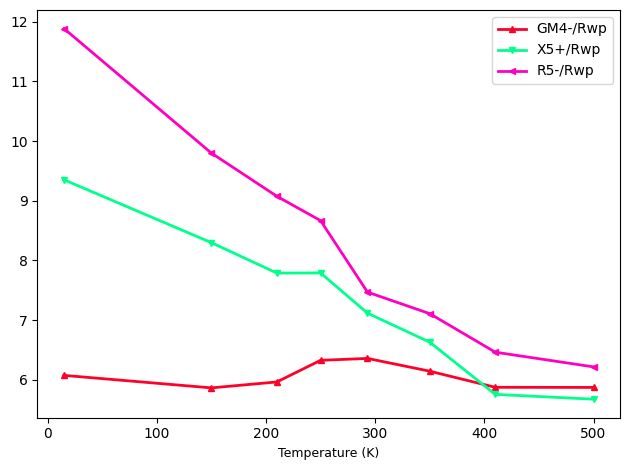

In [22]:
batio3.plot(["GM4-/Rwp", "X5+/Rwp", "R5-/Rwp"]) # this looks at the "best" value by default, this can be changed by supplying index parameter


We can also save figures for all the common variables by using the plot_all function:

In [23]:
batio3.plot_all()

We can also look at correlations between modes within an irrep: 

(The sigma parameter here is a rough measure of how strongly to weight towards the best refinements. The lower sigma is, the more heavily weighted towards the best refinements, since the means are calculated with a weighting of exp((rwp-rwp_0)/sigma)

In [28]:
#print(batio3.hdf["R5-/Rwp"][7,:])
batio3.plot_correlation_matrix("GM4-", 15, sigma = 0.01) 


Using the code above, try and answer the following:

1) Identify the order parameter for the sequence of phase transitions in BaTiO3

2) Identify "secondary" active modes in the cubic phase

3) Using ISOVIZ, determine the character of these secondary modes and identify why they might be active in the cubic phase

4) What do the correlations of individual modes within the order parameter tell you?